# Punto 1
## Punto 9 capítulo 3
<p><big><b>9) (a)</b></big> <big> Produce a scatterplot matrix which includes all of the variables in the data set.</big></p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from scipy import stats 
import statsmodels.api as sm
from sklearn import linear_model
import statsmodels.formula.api as smf

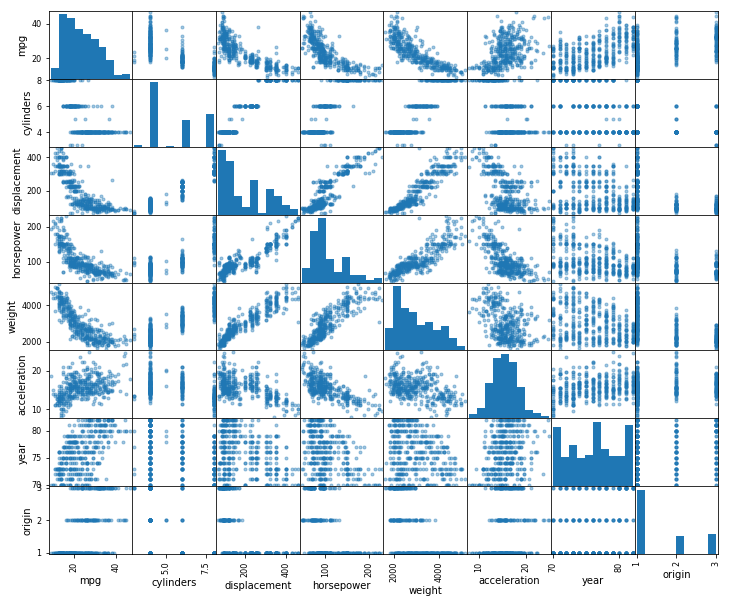

In [2]:
#Importo base
auto=pd.read_csv("C:\\Users\\Iván\\Desktop\\Mineria\\Taller\\Taller 2\\Bases/Auto.csv",na_values=["?"])
auto.dropna()
#Grafico Scatter Matrix
scatter_matrix(auto,alpha=0.4,diagonal='hist',figsize=(12,10))
plt.show()

<big><b>(b)</b></big> <big> Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, cor() which is qualitative.

In [3]:
pd.DataFrame.corr(auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


<big><b>(c)</b></big> <big>Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results.</big>

In [4]:
y=auto[[0]]
x=auto.iloc[:,1:8]
x= sm.add_constant(x)
#sm.OLS?
result=sm.OLS(y,x, missing="drop")
result=result.fit()
#result.params
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.818    
Dependent Variable: mpg              AIC:                2062.9495
Date:               2017-03-08 22:28 BIC:                2094.7196
No. Observations:   392              Log-Likelihood:     -1023.5  
Df Model:           7                F-statistic:        252.4    
Df Residuals:       384              Prob (F-statistic): 2.04e-139
R-squared:          0.821            Scale:              11.073   
------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
------------------------------------------------------------------
const            -17.2184   4.6443 -3.7074 0.0002 -26.3499 -8.0870
cylinders         -0.4934   0.3233 -1.5261 0.1278  -1.1290  0.1422
displacement       0.0199   0.0075  2.6474 0.0084   0.0051  0.0347
horsepower        -0.0170   0.0138 -1.2295 0.2196  -0.0441  0.0102
weight            -0.0065   0.0007 -9.9288 0.0000  -0.0078 -0.0052
acceleration       0.0806   0.0988  0.8152 0.4155  -0.1138  0.2749
year               0.7508   0.0510 14.7288 0.0000   0.6506  0.8510
origin             1.4261   0.2781  5.1275 0.0000   0.8793  1.9730
------------------------------------------------------------------
Omnibus:               31.906       Durbin-Watson:          1.309 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       53.100
Skew:                  0.529        Prob(JB):               0.000 
Kurtosis:              4.460        Condition No.:          85850 
==================================================================
* The condition number is large (9e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [5]:
result_1 = smf.ols('mpg ~ cylinders +displacement + horsepower +weight +acceleration + year + origin', auto).fit()
result_1.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,-17.2184,4.644,-3.707,0.000,-26.350 -8.087
cylinders,-0.4934,0.323,-1.526,0.128,-1.129 0.142
displacement,0.0199,0.008,2.647,0.008,0.005 0.035
horsepower,-0.0170,0.014,-1.230,0.220,-0.044 0.010
weight,-0.0065,0.001,-9.929,0.000,-0.008 -0.005
acceleration,0.0806,0.099,0.815,0.415,-0.114 0.275
year,0.7508,0.051,14.729,0.000,0.651 0.851
origin,1.4261,0.278,5.127,0.000,0.879 1.973


<p><big> <b> Comment on the output. </b></big></p>
<p><big>For instance:</big></p>
<p><big><b> i. Is there a relationship between the predictors and the response?</b></big> </p>
<p>Para determinar si hay una relación entre los predictores y la respuesta es necesario ver los resultados de la prueba conjunta F donde</p>
<p></p>
$$H_0 = \beta_1 + \beta_2+\beta_3+\beta_4+\beta_5+\beta_6+\beta_7=0$$
<p></p>
$$H_a: Por\hspace{0.1cm}lo\hspace{0.1cm} menos\hspace{0.1cm}un\hspace{0.1cm} coeficiente\hspace{0.1cm} \neq\hspace{0.1cm} 0$$
<p></p>
<p>En este caso, el F estadístico es 252.4, y sabiendo que n=397, podemos decir que tenemos evidencia en contra de la hipotesis nula lo que sugiere que por lo menos una variebla esta relacionada con la variable dependiente </p>
<p><big><b> ii. Which predictors appear to have a statistically significant
relationship to the response? </b></big> </p>
<p> Viendo los p valores podemos concluir que <i>displacement</i> (al 0.01 de significancia), <i>weight, year</i> y <i>origin</i> son estadísticamente significativos. </p>
<p> <big><b>iii. What does the coefficient for the year variable suggest?</b></big></p>
<p>El coeficiente sugiere que con cada año adicional y manteniendo las demás constantes, se puede esperar un aumento en el mpg de <b>0.75</b></p>.

<big><b>(d)</b> Use the plot() function to produce diagnostic plots of the linear regression fit. 
Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? 
Does the leverage plot identify any observations with unusually high leverage? </big>

In [6]:
auto["yhat"]=result_1.fittedvalues
auto["residual"]=result_1.resid

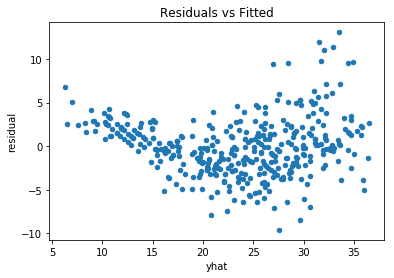

In [7]:
#por matplotlib directo
auto.plot.scatter(x="yhat",y="residual")
plt.title("Residuals vs Fitted")
plt.show()


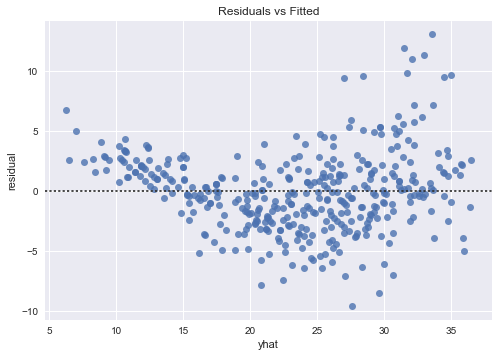

In [8]:
#con seaborn
import seaborn as sns
sns.residplot(auto["yhat"],auto["residual"], data=auto)
plt.title("Residuals vs Fitted")
plt.show()

El principal problema que se puede ver es que los datos están dispersos de tal forma que hay una curvatura. El modelo de regresion lineal, sugiere que hay linealidad entre los predictores y la respuesta Ello sugerir+ia que 
que el modelo no esta capturando todo y puede existir una no linealidad. Particularmente se puede apreciar que en los límites de las respuestas estimadas
los residuales tienden a ser más grandes y hay presencia de varios puntos muy alejados.


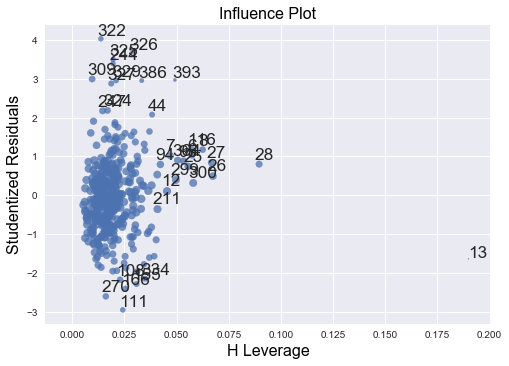

In [9]:
#fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(result_1, alpha  = 0.05,size=1,  criterion="cooks",figsize=(12,10))
plt.show()

Podemos observar que existe un punto, la observación 13, muy alejado con un <i>H leverage</i> (que identifica cuando las características están muy alejadas de la normalidad) muy alto pero con un <i>Studentized Residual</i> (que detecta outliers) relativamente bajo. El gráfico nos muestra que existe una gran cantidad de responses atípicas.

<p><big><b>(e)</b> Use the * and : symbols to fit linear regression models with
interaction effects. Do any interactions appear to be statistically
significant?</big></p>

Las correlaciones más altas son de cylinders con displacement y displacement con weight por lo que las interacciones se harán 
con estas variables

In [14]:
result_2 = smf.ols('mpg ~ cylinders*displacement + displacement*weight+ horsepower +acceleration + year + origin', auto).fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     258.2
Date:                Wed, 08 Mar 2017   Prob (F-statistic):          2.04e-156
Time:                        22:40:56   Log-Likelihood:                -977.47
No. Observations:                 392   AIC:                             1975.
Df Residuals:                     382   BIC:                             2015.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                 -4.7953      4.515     -1.062      0.289       -13.672     4.081
cylinders                 -0.1091      0.597     -0.183      0.855        -1.282     1.064
displacement              -0.0719      0.014     -5.273      0.000        -0.099    -0.045
cylinders:displacement     0.0012      0.003      0.437      0.663        -0.004     0.007
weight                    -0.0103      0.001     -9.680      0.000        -0.012    -0.008
displacement:weight     2.141e-05   3.71e-06      5.768      0.000      1.41e-05  2.87e-05
horsepower                -0.0346      0.013     -2.651      0.008        -0.060    -0.009
acceleration               0.0662      0.088      0.751      0.453        -0.107     0.240
year                       0.7840      0.046     17.171      0.000         0.694     0.874
origin                     0.5475      0.264      2.071      0.039         0.028     1.067
==============================================================================
Omnibus:                       46.636   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.873
Skew:                           0.634   Prob(JB):                     7.56e-23
Kurtosis:                       5.151   Cond. No.                     2.54e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

El F estadístico sube un poco. La interacción entre <i>cylinders</i> y <i>displacement</i> no es estadísticamente significativo, pero la interacción de 
<i>displacement:weight</i> sí resulta ser significtiva.

<p><big><b>(f)</b> Try a few different transformations of the variables, such as
log(X), √X, X2. Comment on your findings.</big></p>